In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
day_df = pd.read_csv("day.csv")
print("Loaded day.csv — shape:", day_df.shape)
display(Markdown("### Day Dataset Head"))
display(day_df.head())

Loaded day.csv — shape: (731, 16)


### Day Dataset Head

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
def basic_clean(df, name="df"):
    df = df.copy()
    df.columns = [c.strip() for c in df.columns.astype(str)]
    print(f"\n{name} shape: {df.shape}")
    print("Null values per column:")
    print(df.isnull().sum())
    print("Duplicate rows:", df.duplicated().sum())
    if "dteday" in df.columns:
        df["dteday"] = pd.to_datetime(df["dteday"], errors="coerce")
        print(f"Parsed 'dteday' — Nulls:", df["dteday"].isnull().sum())
    return df
day_df = basic_clean(day_df, "day_df")


day_df shape: (731, 16)
Null values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate rows: 0
Parsed 'dteday' — Nulls: 0


In [4]:
def fix_date_like_columns(df, cols):
    for c in cols:
        if c in df.columns:
            if np.issubdtype(df[c].dtype, np.datetime64):
                try:
                    df[c] = df[c].dt.day.astype("Int64")
                except:
                    df[c] = df[c].astype("Int64")
    return df


check_cols = ["weekday", "workingday", "holiday"]

day_df = fix_date_like_columns(day_df, check_cols)
for df, name in [(day_df, "day_df")]:
    for col in df.columns:
        if df[col].dtype == object:
            if df[col].dropna().apply(lambda x: str(x).replace('.', '', 1).isdigit()).all():
                df[col] = pd.to_numeric(df[col], errors="ignore")

print("\nUpdated dtypes (day_df):")
display(day_df.dtypes.head(20))


Updated dtypes (day_df):


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [5]:
day_clean = pd.read_csv("day.csv")

print("Loaded day_cleaned.csv — shape:", day_clean.shape)

display(Markdown("### Day Cleaned Dataset Head"))
display(day_clean.head())

Loaded day_cleaned.csv — shape: (731, 16)


### Day Cleaned Dataset Head

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


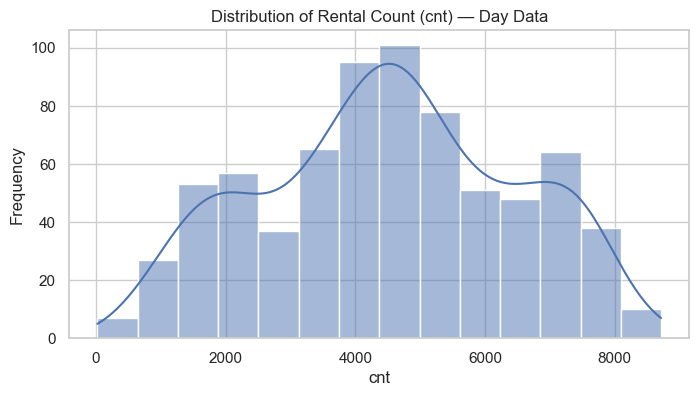

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(day_clean["cnt"], kde=True)
plt.title("Distribution of Rental Count (cnt) — Day Data")
plt.xlabel("cnt")
plt.ylabel("Frequency")
plt.show()

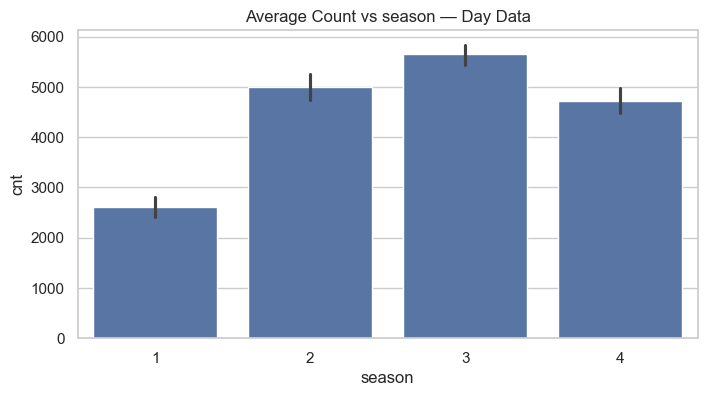

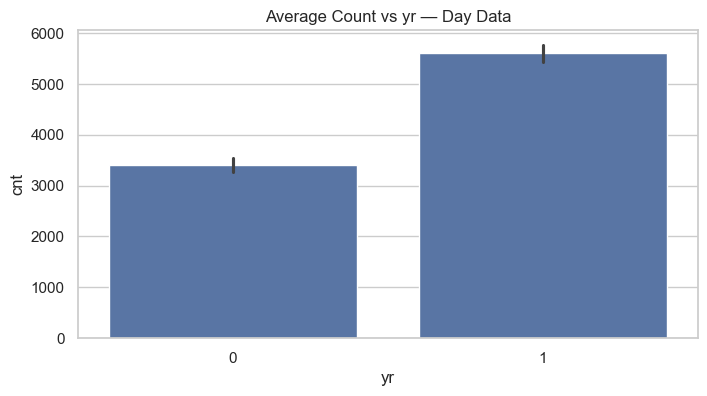

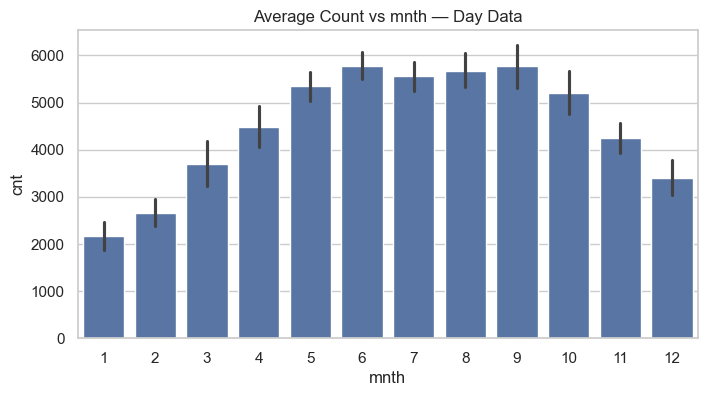

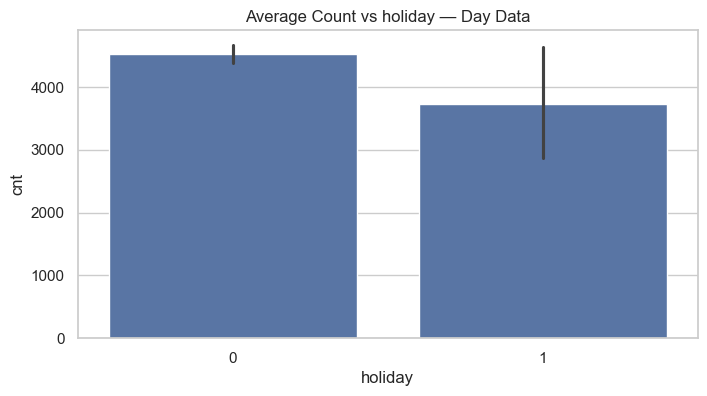

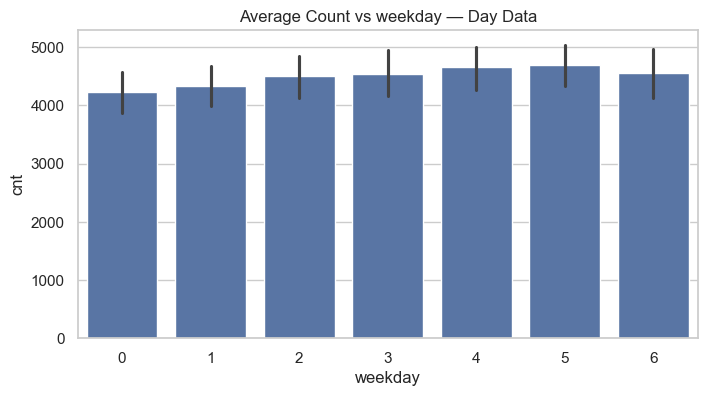

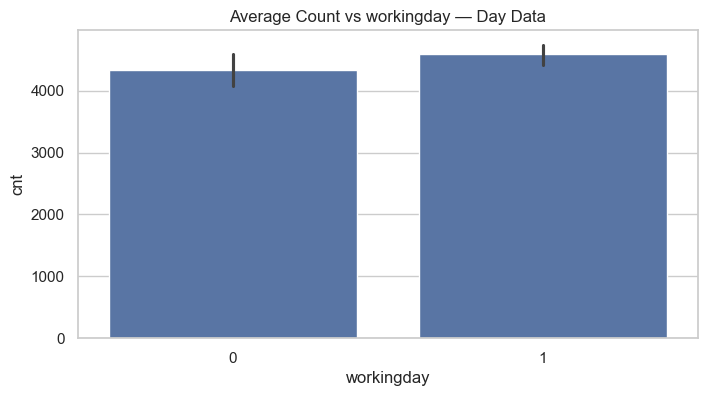

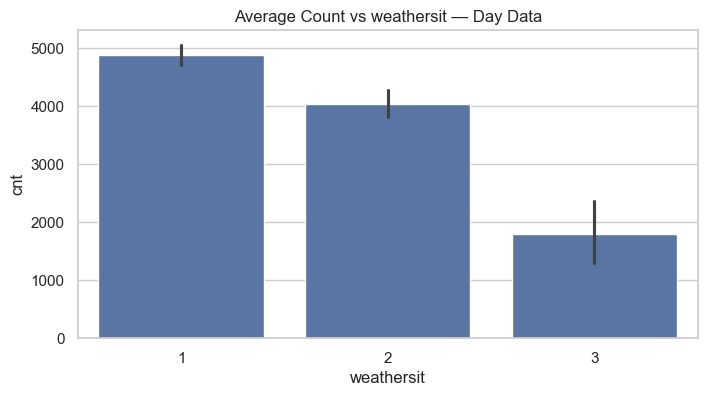

In [7]:
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for col in categorical_cols:
    if col in day_clean.columns:
        plt.figure(figsize=(8, 4))
        sns.barplot(x=col, y="cnt", data=day_clean, estimator=np.mean)
        plt.title(f"Average Count vs {col} — Day Data")
        plt.show()